## Python advanced control
[link text](https://github.com/AtsushiSakai/PyAdvancedControl)

### MPC sample


In [1]:
!pip uninstall cvxpy
!pip install cvxpy==0.4.11 #cvxpy-0.4.10


Uninstalling cvxpy-0.4.11:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cvxpy-0.4.11.dist-info/*
    /usr/local/lib/python3.6/dist-packages/cvxpy/*
Proceed (y/n)? y
  Successfully uninstalled cvxpy-0.4.11
fancyimpute 0.4.2 has requirement cvxpy>=1.0.6, but you'll have cvxpy 0.4.11 which is incompatible.


In [18]:
import time
#from cvxpy import *
import cvxpy
from cvxpy import *

import numpy as np
import matplotlib.pyplot as plt
print("Simulation start")
print(cvxpy.__version__)

Simulation start
0.4.11


In [0]:
#! /usr/bin/python
# -*- coding: utf-8 -*-


np.random.seed(1)
n = 4  # state size
m = 2  # input size
T = 50  # number of horizon

# simulation parameter
alpha = 0.2
beta = 5.0

# Model Parameter
A = np.eye(n) + alpha * np.random.randn(n, n)
B = np.random.randn(n, m)
x_0 = beta * np.random.randn(n, 1)

o = cvxpy.Variable(4)

x = Variable(n, T + 1)
u = Variable(m, T)


#x = cvxpy.Variable(m, T+1)
#u =  x = cvxpy.Variable(n, T+1)

In [0]:
states = []
for t in range(T):
    cost = cvxpy.sum_squares(x[:, t + 1]) + cvxpy.sum_squares(u[:, t])
    constr = [x[:, t + 1] == A * x[:, t] + B * u[:, t],
              norm(u[:, t], 'inf') <= 1]
    states.append(Problem(Minimize(cost), constr))
# sums problem objectives and concatenates constraints.
prob = sum(states)
prob.constraints += [x[:, T] == 0, x[:, 0] == x_0]


In [30]:

print(t)
print(A* x[:, t])
print(type(A))
print(type(u))
#print(A)
#print(B)


49
[[ 1.32486907 -0.12235128 -0.10563435 -0.21459372]
 [ 0.17308153  0.53969226  0.34896235 -0.15224138]
 [ 0.06380782 -0.04987408  1.29242159 -0.41202814]
 [-0.06448344 -0.07681087  0.22675389  0.78002175]] * var12[:, 49]
<class 'numpy.ndarray'>
<class 'cvxpy.expressions.variables.variable.Variable'>



ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.367e-15  -6.769e+01  +2e+03  7e-01  3e-01  1e+00  7e+00    ---    ---    1  1  - |  -  - 
 1  -2.496e+01  -5.370e+01  +1e+03  4e-01  1e-01  8e-01  3e+00  0.5761  1e-01   1  1  1 |  0  0
 2  -1.076e+01  -4.127e+01  +1e+03  4e-01  1e-01  1e+00  3e+00  0.2304  8e-01   2  2  2 |  0  0
 3  +2.788e+01  +1.187e+01  +6e+02  3e-01  5e-02  1e+00  2e+00  0.6546  3e-01   2  2  2 |  0  0
 4  +7.005e+01  +5.520e+01  +4e+02  3e-01  4e-02  2e+00  1e+00  0.4318  4e-01   2  2  2 |  0  0
 5  +1.380e+02  +1.279e+02  +2e+02  3e-01  2e-02  2e+00  7e-01  0.5866  3e-01   2  2  1 |  0  0
 6  +2.239e+02  +2.166e+02  +1e+02  3e-01  1e-02  2e+00  4e-01  0.6789  3e-01   2  2  2 |  0  0
 7  +3.325e+02  +3.277e+02  +7e+01  2e-01  9e-03  2e+00  2e-01  0.6690  2e-01   2  2  2 |  0  0
 8  +4.642e+02  +4.614e+02  +3e+01  2e-01  6e-

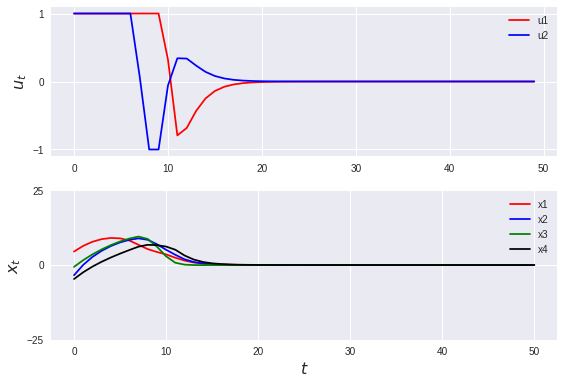

In [31]:


states = []
for t in range(T):
    cost = cvxpy.sum_squares(x[:, t + 1]) + cvxpy.sum_squares(u[:, t])
    constr = [x[:, t + 1] == A * x[:, t] + B * u[:, t],
              norm(u[:, t], 'inf') <= 1]
    states.append(Problem(Minimize(cost), constr))
# sums problem objectives and concatenates constraints.
prob = sum(states)
prob.constraints += [x[:, T] == 0, x[:, 0] == x_0]

start = time.time()
result = prob.solve(verbose=True)
elapsed_time = time.time() - start
print ("calc time:{0}".format(elapsed_time) + "[sec]")

if result == float("inf"):
    print("Cannot optimize")
    import sys
    sys.exit()
    #  return

f = plt.figure()
# Plot (u_t)_1.
ax = f.add_subplot(211)
u1 = np.array(u[0, :].value[0, :])[0].tolist()
u2 = np.array(u[1, :].value[0, :])[0].tolist()
plt.plot(u1, '-r', label="u1")
plt.plot(u2, '-b', label="u2")
plt.ylabel(r"$u_t$", fontsize=16)
plt.yticks(np.linspace(-1.0, 1.0, 3))
plt.legend()
plt.grid(True)

# Plot (u_t)_2.
plt.subplot(2, 1, 2)
x1 = np.array(x[0, :].value[0, :])[0].tolist()
x2 = np.array(x[1, :].value[0, :])[0].tolist()
x3 = np.array(x[2, :].value[0, :])[0].tolist()
x4 = np.array(x[3, :].value[0, :])[0].tolist()
plt.plot(range(T + 1), x1, '-r', label="x1")
plt.plot(range(T + 1), x2, '-b', label="x2")
plt.plot(range(T + 1), x3, '-g', label="x3")
plt.plot(range(T + 1), x4, '-k', label="x4")
plt.yticks([-25, 0, 25])
plt.ylim([-25, 25])
plt.ylabel(r"$x_t$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

calc time:0.0937051773071289[sec]
258208.83999869
calc time:0.12001156806945801[sec]
253274.8358746327


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


calc time:0.1002039909362793[sec]
246404.53828372172
calc time:0.09383368492126465[sec]
239242.30742337537
calc time:0.1488039493560791[sec]
232834.94123652665
calc time:0.09449028968811035[sec]
220497.33588501345
calc time:0.09290623664855957[sec]
218606.84713140817
calc time:0.10121536254882812[sec]
200566.05089219738
calc time:0.09772253036499023[sec]
204052.1063275645
calc time:0.10039281845092773[sec]
179756.5572400049
calc time:0.09566736221313477[sec]
189568.1715840166
calc time:0.09221220016479492[sec]
158441.88978734822
calc time:0.10626101493835449[sec]
175631.09667976617
calc time:0.09550189971923828[sec]
137074.1003639518
calc time:0.09674882888793945[sec]
162801.190735121
calc time:0.09693384170532227[sec]
120829.82262326652
calc time:0.1144101619720459[sec]
151277.89659524435
calc time:0.09915995597839355[sec]
109690.78053390754
calc time:0.09839200973510742[sec]
140184.3893224699
calc time:0.09870123863220215[sec]
99093.2001407609
calc time:0.09766674041748047[sec]
12951

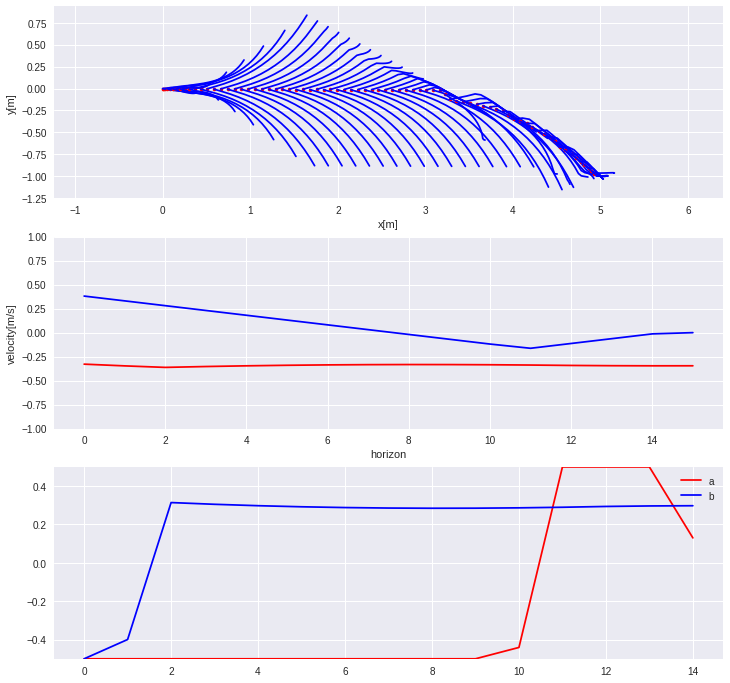

In [32]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
u""" 
MPC driving simulation to target point 

author Atsushi Sakai
"""

import cvxpy
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt
from math import *
import time

dt = 0.1  # [s] discrete time
lr = 1.0  # [m]
T = 15  # number of horizon
target = [5.0, -1.0]  # [x,y]

max_speed = 5.0
min_speed = -5.0


def LinealizeCarModel(xb, u, dt, lr):
    u"""
    TODO conplete model
    """

    x = xb[0]
    y = xb[1]
    v = xb[2]
    theta = xb[3]

    a = u[0]
    beta = u[1]

    t1 = -dt * v * sin(theta + beta)
    t2 = dt * v * cos(theta + beta)

    A = np.eye(xb.shape[0])
    A[0, 2] = dt * cos(theta + beta)
    A[1, 2] = dt * sin(theta + beta)
    A[3, 2] = dt * sin(beta) / lr
    A[0, 3] = t1
    A[1, 3] = t2

    B = np.zeros((xb.shape[0], u.shape[0]))
    B[2, 0] = dt
    B[0, 1] = t1
    B[1, 1] = t2
    B[3, 1] = dt * v * cos(beta) / lr

    tm = np.zeros((4, 1))
    tm[0, 0] = v * cos(theta + beta) * dt
    tm[1, 0] = v * sin(theta + beta) * dt
    tm[2, 0] = a * dt
    tm[3, 0] = v / lr * sin(beta) * dt
    C = xb + tm
    C = C - A * xb - B * u

    return A, B, C


def NonlinearModel(x, u, dt, lr):
    print(x.value)
    x[0] = x[0] + x[2] * cos(x[3] + u[1]) * dt
    x[1] = x[1] + x[2] * sin(x[3] + u[1]) * dt
    x[2] = x[2] + u[0] * dt
    x[3] = x[3] + x[2] / lr * sin(u[1]) * dt

    return x


def CalcInput(A, B, C, x, u):

    x_0 = x[:]
    x = Variable(x.shape[0], T + 1)
    u = Variable(u.shape[0], T)

    # MPC controller
    states = []
    for t in range(T):
        #  constr = [x[:,t+1] == A*x[:,t] + B*u[:,t]+C, abs(u[:,t])<=0.5, x[2,t+1]<= max_speed, x[2,t+1] >= min_speed]
        constr = [x[:, t + 1] == A * x[:, t] + B * u[:, t] + C]
        #  constr = [x[:,t+1] == NonlinearModel(x[:,t],u,dt,lr)]
        constr += [abs(u[:, t]) <= 0.5]
        constr += [x[2, t + 1] <= max_speed]
        constr += [x[2, t + 1] >= min_speed]
        #  cost = sum_squares(u[:,t])
        cost = sum_squares(abs(x[0, t] - target[0])) * 10.0 * t
        cost += sum_squares(abs(x[1, t] - target[1])) * 10.0 * t
        if t == T - 1:
            cost += (x[0, t + 1] - target[0]) ** 2 * 10000.0
            cost += (x[1, t + 1] - target[1]) ** 2 * 10000.0

        states.append(Problem(Minimize(cost), constr))

    prob = sum(states)
    prob.constraints += [x[:, 0] == x_0, x[2, T] == 0.0]

    start = time.time()
    #  result=prob.solve(verbose=True)
    result = prob.solve()
    elapsed_time = time.time() - start
    print ("calc time:{0}".format(elapsed_time) + "[sec]")
    print (prob.value)

    if prob.status != OPTIMAL:
        print("Cannot calc opt")

    #  print(prob.status)
    return u, x, prob.value


def GetListFromMatrix(x):
    return np.array(x).flatten().tolist()


def Main():
    x0 = np.matrix([0.0, 0.0, 0.0, 0.0]).T  # [x,y,v theta]
    x = x0
    u = np.matrix([0.0, 0.00]).T  # [a,beta]
    plt.figure(num=None, figsize=(12, 12))

    mincost = 100000

    for i in range(1000):
        A, B, C = LinealizeCarModel(x, u, dt, lr)
        ustar, xstar, cost = CalcInput(A, B, C, x, u)

        u[0, 0] = GetListFromMatrix(ustar.value[0, :])[0]
        u[1, 0] = float(ustar[1, 0].value)

        x = A * x + B * u

        plt.subplot(3, 1, 1)
        plt.plot(target[0], target[1], 'xb')
        plt.plot(x[0], x[1], '.r')
        plt.plot(GetListFromMatrix(xstar.value[0, :]), GetListFromMatrix(xstar.value[1, :]), '-b')
        plt.axis("equal")
        plt.xlabel("x[m]")
        plt.ylabel("y[m]")
        plt.grid(True)

        plt.subplot(3, 1, 2)
        plt.cla()
        plt.plot(GetListFromMatrix(xstar.value[2, :]), '-b')
        plt.plot(GetListFromMatrix(xstar.value[3, :]), '-r')
        plt.ylim([-1.0, 1.0])
        plt.ylabel("velocity[m/s]")
        plt.xlabel("horizon")
        plt.grid(True)

        plt.subplot(3, 1, 3)
        plt.cla()
        plt.plot(GetListFromMatrix(ustar.value[0, :]), '-r', label="a")
        plt.plot(GetListFromMatrix(ustar.value[1, :]), '-b', label="b")
        plt.ylim([-0.5, 0.5])
        plt.legend()
        plt.grid(True)

        #  plt.pause(0.0001)

        #  raw_input()

        # check goal
        dis = np.linalg.norm([x[0] - target[0], x[1] - target[1]])
        if (dis < 0.1):
            print("Goal")
            break

    plt.show()


if __name__ == '__main__':
    Main()
